# Análise do mercado de jogos na steam com foco em efetividade de custo  
Integrantes:  
Flávio Eduardo Souto Maior Serrano  
Erika Janine Lira Dos Santos  
Artur Luis Brito Gurjão  

# Introdução  
O mercado de jogos eletrônicos vem crescendo e hoje é um grande mercado que segundo estimativas deve movimentar cerca de 200 bilhões de dólares até 2023, em outra frente temos que cada vez mais é necessário fazer análises de dados para que se possa ser bem sucedido no mercado e criar produtos que as pessoas realmente queiram comprar, tendo em vista esse contexto fizemos uma análise de um dos maiores marketplaces de jogos eletrônicos do mundo, a Steam, a nossa análise tem como objetivo criar um jogo muito popular e que a maioria das pessoas gostem, gastando a menor quantidade de dinheiro possível, essa estratégia vem se tornando cada vez mais popular como podemos ver com os jogos "Indie".

# Dados Utilizados
Os dados utilizados foram encontrados no kaggle, as bases se tratam de dados extraidos pela api da steam que foram tratados

# Metodologia

## Pré-Processamento

### • Importanto o pandas para o tratamento e visualização dos dados

In [1]:
import pandas as pd

### • Abrindo o dataset "steam.csv" através do read_csv

In [2]:
df_steam = pd.read_csv("steam.csv")
df_steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


### • Transformando as datas do dataset no formato datetime do pandas que estão na coluna "release_date"

In [3]:
df_steam_date = df_steam['release_date']
df_steam_date = pd.to_datetime(df_steam_date)

In [4]:
df_steam['release_date'] = df_steam_date
df_steam['release_date']

0       2000-11-01
1       1999-04-01
2       2003-05-01
3       2001-06-01
4       1999-11-01
           ...    
27070   2019-04-24
27071   2019-04-23
27072   2019-04-24
27073   2019-04-17
27074   2019-04-24
Name: release_date, Length: 27075, dtype: datetime64[ns]

### • Verificando se há dados nulos nas colunas e linhas

In [5]:
df_steam.isnull().sum(axis = 0)

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [6]:
df_steam.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
27070    0
27071    0
27072    0
27073    0
27074    0
Length: 27075, dtype: int64

### • No dataset há a coluna "owners" onde indica por meio de lower bound e upper bound a quantidade de proprietários do jogo, mas foi indicado no dataset tratar esses dados como a média entre os 2.
#### -> Através da função apply do pandas que aplica uma função para uma determinada coluna no dataset, foi passado um lambda x que percorre a coluna e separa os 2 valores que estão em formato de string através de split e transformando em inteiros, assim aplicando a fórmula de média

In [7]:
df_steam['owners']

0        10000000-20000000
1         5000000-10000000
2         5000000-10000000
3         5000000-10000000
4         5000000-10000000
               ...        
27070              0-20000
27071              0-20000
27072              0-20000
27073              0-20000
27074              0-20000
Name: owners, Length: 27075, dtype: object

In [8]:
df_steam['owners'] = df_steam['owners'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1]))/2)

In [9]:
df_steam['owners']

0        15000000.0
1         7500000.0
2         7500000.0
3         7500000.0
4         7500000.0
            ...    
27070       10000.0
27071       10000.0
27072       10000.0
27073       10000.0
27074       10000.0
Name: owners, Length: 27075, dtype: float64

### • Foi necessário retirar uma linha do dataset pois foi observado que havia dados nulos

In [10]:
df_steam = df_steam.drop(index=[6258,6259])

### • A coluna "platforms" apresenta a plataforma em que o jogo é suportado, podendo ser windows, linux ou macOs. Para uma utilização mais "limpa" dessa coluna posteriormente foi necessário aplicar o método "one hot encoding" que transforma dados categóricos em forma binária através de novas colunas

In [11]:
df_steam["platforms"]

0        windows;mac;linux
1        windows;mac;linux
2        windows;mac;linux
3        windows;mac;linux
4        windows;mac;linux
               ...        
27070              windows
27071              windows
27072              windows
27073          windows;mac
27074          windows;mac
Name: platforms, Length: 27073, dtype: object

In [12]:
df_steam["windows"]=[1 if "windows" in x else 0 for x in df_steam["platforms"]]
df_steam["linux"]=[1 if "linux" in x else 0 for x in df_steam["platforms"]]
df_steam["mac"]=[1 if "mac" in x else 0 for x in df_steam["platforms"]]
df_steam[['windows','linux','mac']]

,windows,linux,mac
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
27070,1,0,0
27071,1,0,0
27072,1,0,0
27073,1,0,1


### • Adicionando 2 novas colunas: porcentagem de avaliações positivas e total de avaliações. Para isso foi utilizado as colunas "positive_ratings" e "negative_ratings"

In [13]:
df_steam["rating"]=df_steam["positive_ratings"]/(df_steam["positive_ratings"]+df_steam["negative_ratings"])*100
df_steam["totalRatings"]=df_steam["positive_ratings"]+df_steam["negative_ratings"]
df_steam[['rating', 'totalRatings']]

,rating,totalRatings
0,97.388815,127873
1,83.978740,3951
2,89.564761,3814
3,82.662338,1540
4,94.799567,5538
...,...,...
27070,100.000000,3
27071,88.888889,9
27072,0.000000,1
27073,100.000000,2


## Perguntas

### • Como é a distribuição de preços dos jogos?
#### -> Foi criado um gráfico de barras para visualização da média, mediana e desvio padrão dos preços dos jogos que estão contidos na coluna "prices".
#### -> Necessário a importação do numpy para as funções matemáticas e o matplotlib para plotagem do gráfico

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#### -> Utilização dos métodos que facilitam a extração da média, mediana e desvio padrão do numpy: mean, nanmedian, std
#### -> Foi utilizado um laço para designação do nome das barras no gráfico através da iteração da lista que contém os métodos supracitados

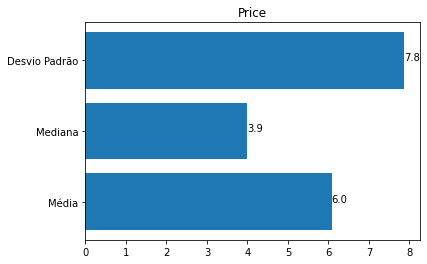

In [15]:
x = ["Média", "Mediana", "Desvio Padrão"]
y = [np.mean(df_steam['price']), np.nanmedian(df_steam['price']), np.std(df_steam['price'])]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value)[:3])
plt.title("Price")
plt.show()

### • Quais os jogos com mais avaliações positivas?
#### -> Uma variável nova foi atribuída para armazenar um corte do dataset original onde contém apenas as colunas "name"(nomes dos jogos) e "positive ratings"(avaliações positivas)
#### -> A função sort_values ordena as linhas em forma de ascendência(ascending=False faz ordenar os dados dos maiores valores para os menores)
#### -> Função loc seleciona apenas as linhas e colunas necessárias, no nosso caso, pegamos apenas os 7 primeiros jogos para melhor visualização dos dados nos gráficos

In [16]:
steam_cut = df_steam[['name','positive_ratings']]
steam_cut = steam_cut.sort_values('positive_ratings', ascending=False).reset_index()
steam_cut = steam_cut.loc[:6,:]
steam_cut

,index,name,positive_ratings
0,25,Counter-Strike: Global Offensive,2644404
1,22,Dota 2,863507
2,19,Team Fortress 2,515879
3,12836,PLAYERUNKNOWN'S BATTLEGROUNDS,496184
4,121,Garry's Mod,363721
5,2478,Grand Theft Auto V,329061
6,1467,PAYDAY 2,308657


#### -> Para plotagem dos gráficos utilizamos a biblioteca do seaborn

In [17]:
import seaborn as sns

#### -> Em conjunto com o matplotlib, podemos editar o tamanho do gráfico conforme desejado utilizando o figsize.
#### -> Também alteramos o título e os rótulos X e Y.

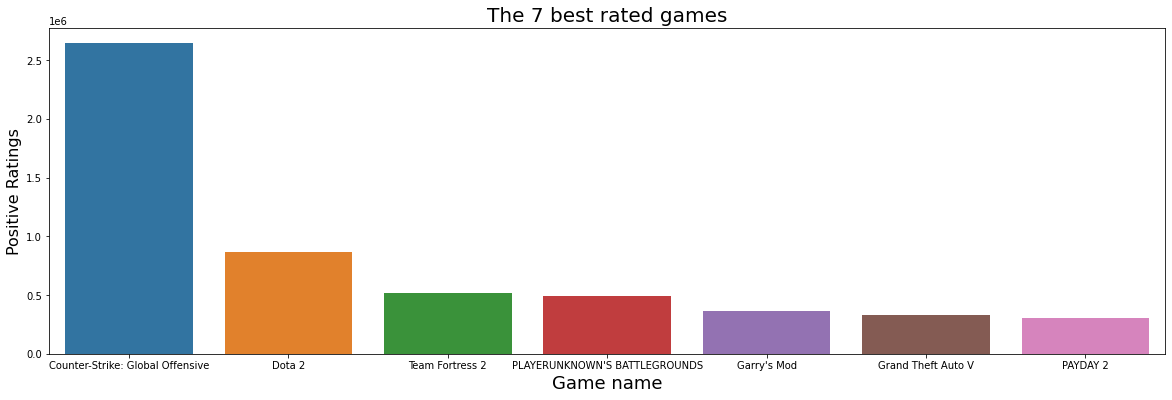

In [18]:
fig, ax = plt.subplots(figsize=(20,6))
ax = sns.barplot(x="name", y="positive_ratings", data=steam_cut)
plt.title('The 7 best rated games', fontsize=20)
plt.xlabel('Game name', fontsize=18)
plt.ylabel('Positive Ratings', fontsize=16)
plt.show()

### • Como foi o crescimento da quantidade de jogos lançados por ano na steam?

#### -> Foram importados as funções Counter e OrderedDict da biblioteca collections.
#### -> Essas 2 funções nos ajudam na contagem de dados únicos num dicionários.

In [19]:
from collections import Counter, OrderedDict

#### -> Foi atribuído a variável data_count um dicionário onde foi armazenado através de um laço o ano de lançamento de cada jogo na steam.
#### -> Em keys foi armazenado através do Counter os diferentes tipos de anos que estão contidos no dataset(vai de 1997 à 2019. 
#### -> Em values foi armazenado a quantidade de jogos lançados por cada ano.

In [21]:
date_count = {}

date_count = [str(x).split('-')[0] for x in df_steam['release_date']]
keys = Counter(date_count).keys()
values = Counter(date_count).values()

In [22]:
keys

dict_keys(['2000', '1999', '2003', '2001', '1998', '2004', '2010', '2005', '2006', '2007', '2008', '2009', '2013', '2011', '2012', '2014', '2018', '2015', '2017', '2016', '2002', '2019', '1997'])

In [23]:
values

dict_values([2, 2, 3, 4, 1, 6, 238, 6, 48, 93, 145, 305, 418, 239, 320, 1555, 8160, 2596, 6356, 4361, 1, 2213, 1])

#### -> A função zip em conjunto com o dict cria um dicionário relacionando cada valor a seu ano, após isso utilizamos o sorted para ordenar o dicionário de acordo com o ano, indo do menor para o maior, de 1997 à 2019.

In [24]:
dict_date_count = dict(zip(keys, values))
dict_date_count = {int(k):v for k,v in dict_date_count.items()}

dict_date_count = OrderedDict(sorted(dict_date_count.items()))
dict_date_count = dict(dict_date_count)

In [25]:
dict_date_count

{1997: 1,
 1998: 1,
 1999: 2,
 2000: 2,
 2001: 4,
 2002: 1,
 2003: 3,
 2004: 6,
 2005: 6,
 2006: 48,
 2007: 93,
 2008: 145,
 2009: 305,
 2010: 238,
 2011: 239,
 2012: 320,
 2013: 418,
 2014: 1555,
 2015: 2596,
 2016: 4361,
 2017: 6356,
 2018: 8160,
 2019: 2213}

#### -> Plotagem do gráfico de linha com matplotlib

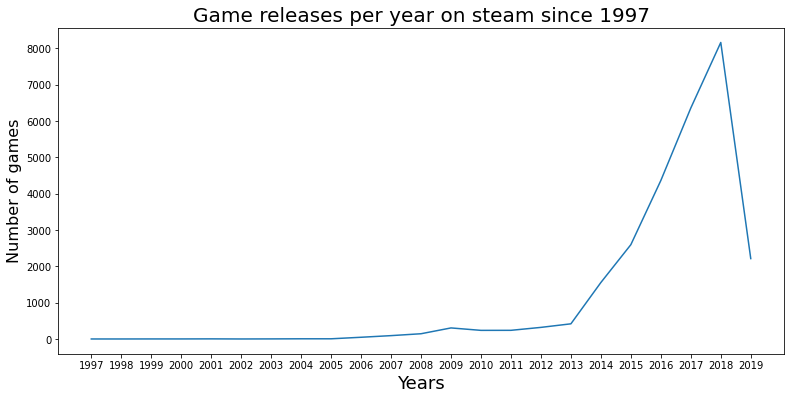

In [26]:
plt.subplots(figsize=(13,6))
plt.plot(range(len(dict_date_count)), list(dict_date_count.values()))
plt.xticks(range(len(dict_date_count)), list(dict_date_count.keys()))
plt.title('Game releases per year on steam since 1997', fontsize=20)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of games', fontsize=16)

plt.show()

#### -> Observa-se no gráfico uma queda de lançamento de jogos no ano de 2019, isso acontece devido ao dataset ter dados de até alguns mêses de 2019.

# É possível prever o número de owners de um jogo baseado na classificação ou no preço?

In [32]:
from sklearn import datasets, linear_model

0.0012363988220204236


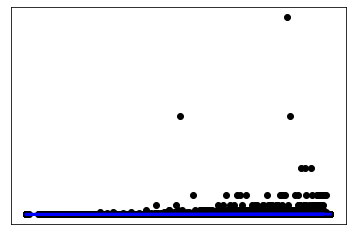

In [45]:
x=df_steam['rating'].values.reshape(-1, 1)
y=df_steam['owners'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
print(regr.score(x, y))
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

0.0009655484983606133


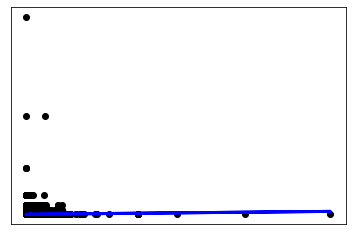

In [46]:
x=df_steam['price'].values.reshape(-1, 1)
y=df_steam['owners'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
print(regr.score(x, y))
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Podemos identificar pelo score da regressão linear que a rating pode ser um indicador melhor que o preço para se o jogo será muito comprado, porém nenhuma das duas métricas tem uma relação proxima a linear com o número de owners, Como podemos ver nos gráficos isso se deve a um grande número de outliers que de certa forma poluem a análise, porém demonstram certa randomicidade do "sucesso" dos jogos que é ter muitos jogadores.

### Filtrando os outliers 

Aqui filtramos outliers de cada varíavel envolvida para buscar algum padrão

In [72]:
print(len(df_steam))
df_filtered=df_steam[np.abs(df_steam.price-df_steam.price.mean())<=(3*df_steam.price.std())]
print(len(df_filtered))
df_filtered=df_filtered[np.abs(df_filtered.owners-df_filtered.owners.mean())<=(3*df_filtered.owners.std())]
print(len(df_filtered))
df_filtered=df_filtered[np.abs(df_filtered.rating-df_filtered.rating.mean())<=(3*df_filtered.rating.std())]
print(len(df_filtered))

27073
26609
26539
25875


0.004380226207545079


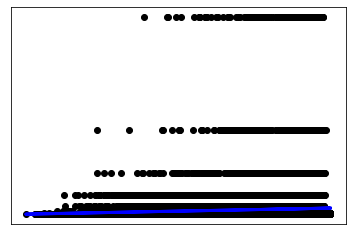

In [74]:
x=df_filtered['rating'].values.reshape(-1, 1)
y=df_filtered['owners'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
print(regr.score(x, y))
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

0.009467122238542292


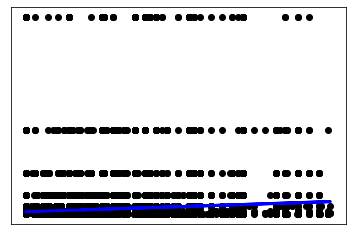

In [76]:
x=df_filtered['price'].values.reshape(-1, 1)
y=df_filtered['owners'].values.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)
print(regr.score(x, y))
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Nesse ponto concluímos que não seria um problema efeito apenas de outliers, mas sim da própria natureza variável dos dados que trabalhamos. O score da regressão com rating obteve alguma melhora com a filtragem, porém mesmo com esse viés não podemos afirmar que exista alguma relação linear entre as variáveis que possamos usar para prever a popularidade de um determinado jogo.

## Conclusão

Podemos concluir a partir deste trabalho que a análise de dados é de extrema importância para análises de mercado. No nosso caso conseguimos extrair muitas informações interessantes que podem ser usadas tanto para stakeholders de empresas de jogos tomares decisões baseadas em dados do mercado, quanto para desenvolvedores em busca de tornar seus jogos mais vendíveis. Conforme exploramos os dados encontramos algumas limitações como a desigualdade nas métricas da base, talvez uma análise focando em nichos específicos de jogos fosse mais interessante dependendo da necessidade de negócio, um trabalho futuro interessante seria utilizar a base de reviews com tecnologias de Natural Language Processing (NLP) para agregar medidas de satisfação com os jogos na base da Steam, esse era o intúito inicial porém saia um pouco do escopo do projeto.